1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

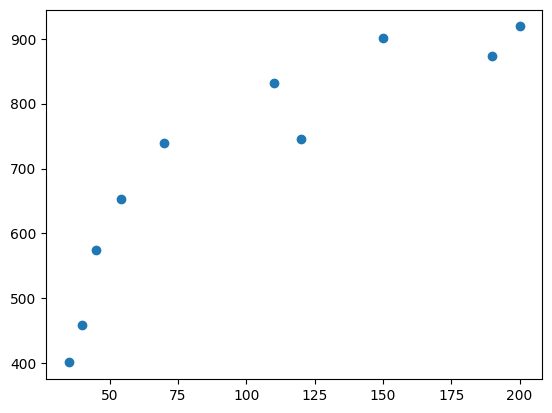

2.620538882402765
444.1773573243596


In [4]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.show()
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)
print(b)
print(a)

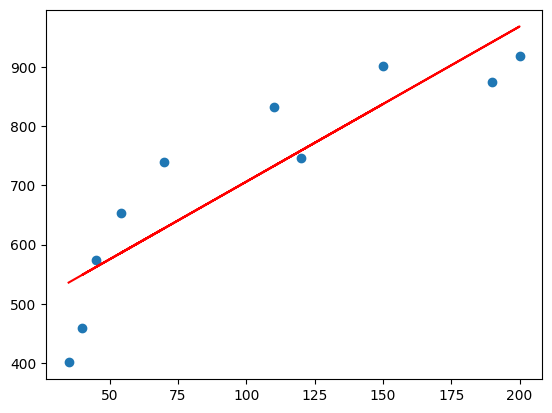

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, c='r')
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [6]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)


mse(b, zp, ks)

203763.93896082853

In [15]:
def mse_p(b, x, y):
    return (2 / len(x)) * np.sum((b * x - y) * x)


alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
for i in range(10000):
    b -= alpha * mse_p(b, zp, ks)
    if i % 1000 == 0:
        print(i, b, mse(b, zp, ks))

0 0.25952808000000005 493237.7212546963
1000 5.8898204201285544 56516.85841571941
2000 5.889820420132673 56516.85841571943
3000 5.889820420132673 56516.85841571943
4000 5.889820420132673 56516.85841571943
5000 5.889820420132673 56516.85841571943
6000 5.889820420132673 56516.85841571943
7000 5.889820420132673 56516.85841571943
8000 5.889820420132673 56516.85841571943
9000 5.889820420132673 56516.85841571943


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)


def mse_pa(a, b, x, y):
    return 2 * np.sum((a + b * x) - y) / len(x)


def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)


alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
for i in range(1000001):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 50000 == 0:
        print(i, a, b, mse_ab(a, b, zp, ks))


0 0.14197959999999998 4.884978596113599 70366.2821016992
50000 236.72655235964433 4.147445287981601 17387.09579189967
100000 347.2559075176058 3.3339127474648516 8853.283372220058
150000 398.89545333636954 2.953828643644366 6990.541626266601
200000 423.0215571081485 2.7762525556795365 6583.946467915477
250000 434.29332323191153 2.69328863611563 6495.195773862671
300000 439.5595159313502 2.6545277194387675 6475.823468184463
350000 442.0198921708081 2.6364185381280407 6471.594924044105
400000 443.16938509390076 2.6279578907579992 6470.671926759022
450000 443.70643059087314 2.624005058617609 6470.470456948132
500000 443.95733936988626 2.622158287177236 6470.426480562332
550000 444.07456447602823 2.6212954716991606 6470.41688149387
600000 444.12933229069927 2.6208923625039224 6470.414786230384
650000 444.15491992822837 2.620704029045041 6470.414328880896
700000 444.1668745259701 2.6206160392593607 6470.41422905166
750000 444.17245973903704 2.6205749302474683 6470.414207261152
800000 444.17

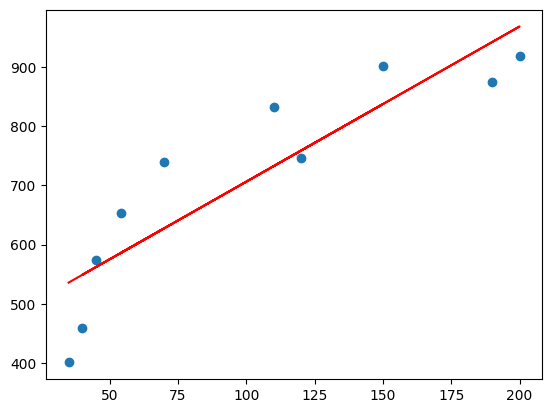

In [18]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, c='r')
plt.show()